# Exploratory Data Analysis

#### Con el fin de lograr captar de mejor manera el comporamiento de los datos, se utilizaran los datos de intervalos de 4 horas.

In [8]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

In [21]:
conn = sql.connect('Data/db/btc.db')
cursor = conn.cursor()
df_4h = pd.read_sql_query("SELECT * FROM btc_4h", conn)

In [22]:
df_4h.drop(columns=['open','high','low'],inplace=True)

In [19]:
#def graficar_histogramas(df, columnas):
#  # Funcion para graficar todos los histogramas de cada una de las variables con los valores de asimetria y curtosis
#  fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 4*len(columnas)))
#  for i, columna in enumerate(columnas):
#    # Graficar histograma
#    sns.histplot(data=df, x=columna, ax=axes[i],bins=50)
#    plt.xlim(auto=True)
#    plt.ylim(auto=True)
#  plt.tight_layout()
#  return fig

def graficar_histogramas(df, columnas):
    # Definir el número de columnas
    n_cols = 3
    # Calcular el número de filas necesarias
    n_rows = int(np.ceil(len(columnas) / n_cols))
    
    # Crear una figura con subplots distribuidos en n_rows x n_cols
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
    
    # Aplanar los ejes para facilitar el acceso con un solo índice
    axes = axes.flatten()

    for i, columna in enumerate(columnas):
        # Graficar histograma en su posición correspondiente
        sns.histplot(data=df, x=columna, ax=axes[i], bins=50)
        axes[i].set_xlim(auto=True)
        axes[i].set_ylim(auto=True)
    
    # Eliminar ejes vacíos si hay
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

In [23]:
df_numeric = df_4h.select_dtypes(include=[np.number])

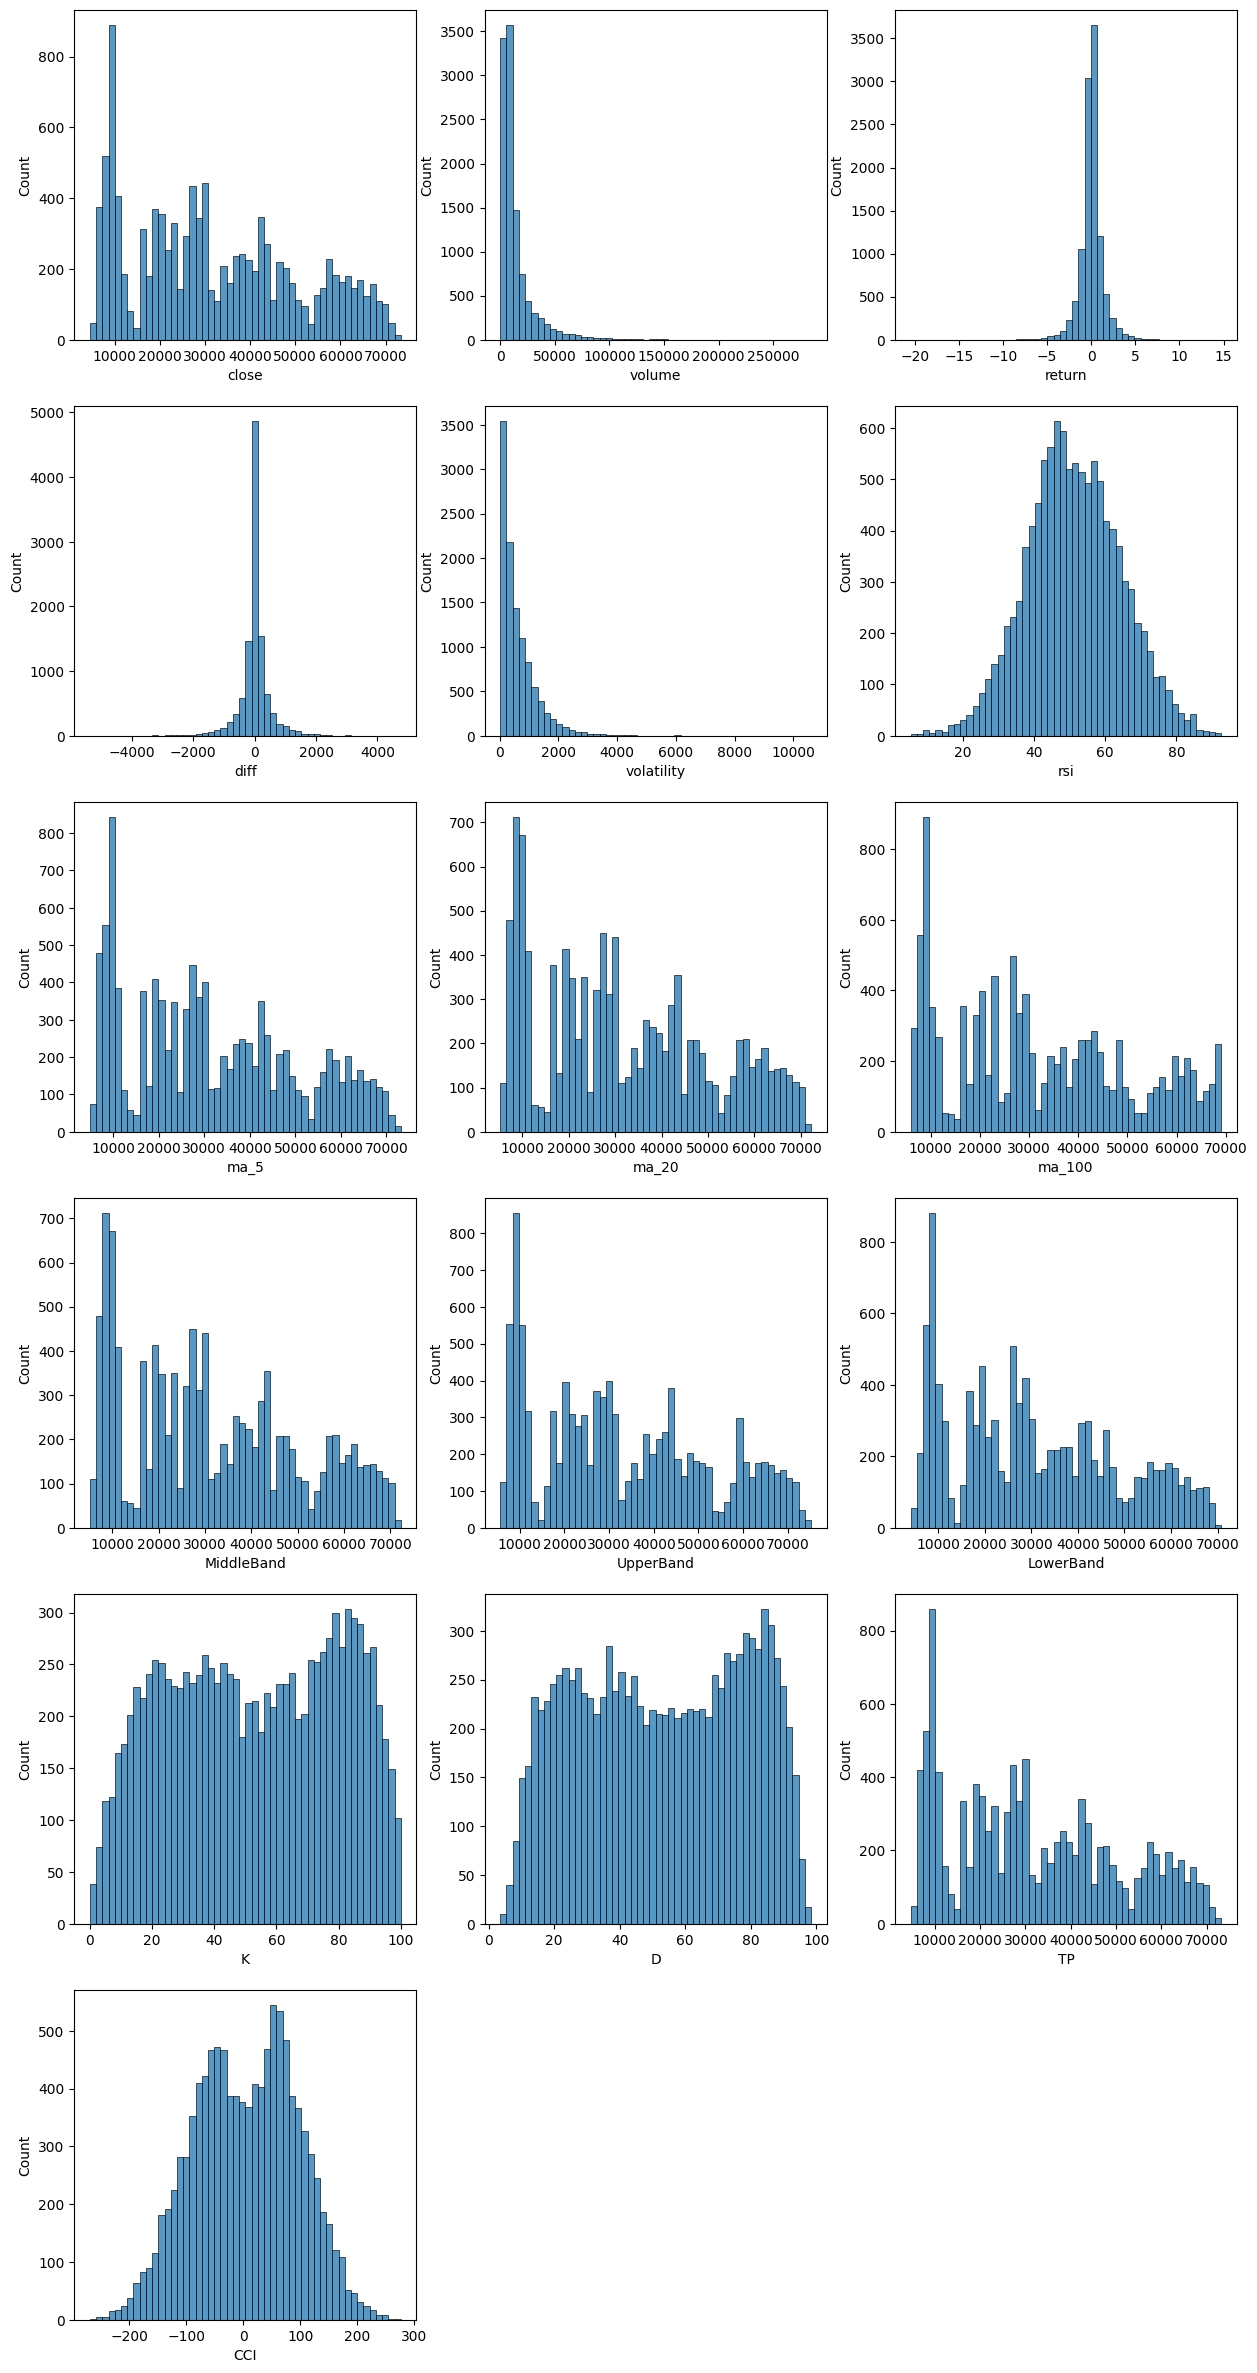

In [24]:
hist = graficar_histogramas(df_numeric,df_numeric.columns)

## 1.1 Correlation of the features

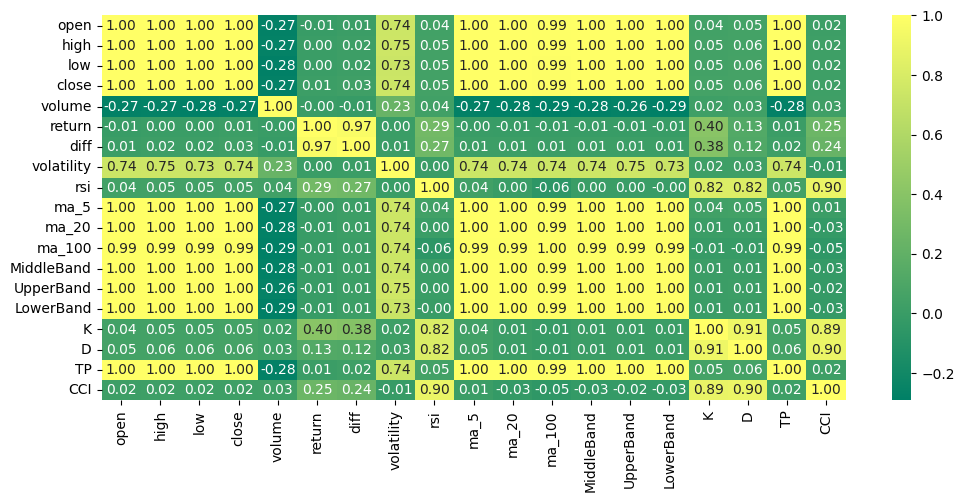

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(df_numeric.corr(method='spearman'),annot=True,fmt='.2f',cmap='summer')
plt.show()